In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

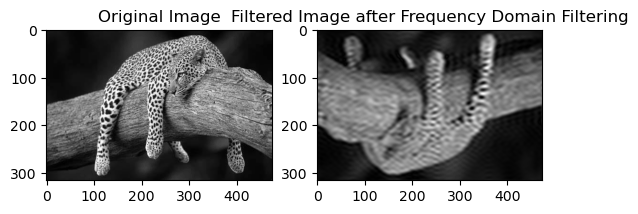

In [10]:
image=cv2.imread('C:/Users/M.Tech DS006/Desktop/OIP.jfif',0)

dft=cv2.dft(np.float32(image),flags=cv2.DFT_COMPLEX_OUTPUT)#Perform Fourier Transform to transform the img from spatial to frequency domain
dft_shift=np.fft.fftshift(dft)#Shifting the frequency components so that the low frequencies are centered.


## Create a mask for the filter (Ex. a Low Pass Filter)
rows,cols=image.shape
cRow,cCol=rows//2,cols//2
mask=np.zeros((rows,cols,2),np.uint8)
mask[cRow-30:cRow+30,cCol-30:cCol+30]=1    # 1 for Low Pass Filter 0 for High pass Filter

fshift=dft_shift*mask

## Inverse DFT to get the image back
f_ishift=np.fft.ifftshift(fshift) ## inverse shift
img_back=cv2.idft(fshift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


#Display THe Result
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.title('Original Image')


plt.subplot(122)
plt.imshow(img_back,cmap='gray')
plt.title('Filtered Image after Frequency Domain Filtering')

plt.show()

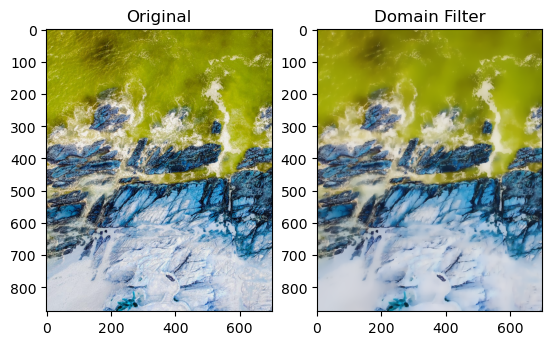

In [4]:
img = cv2.imread('C:/Users/M.Tech DS006/Desktop/img.jpg',cv2.IMREAD_UNCHANGED)
domainFilter = cv2.edgePreservingFilter(img, flags=1, sigma_s=60, sigma_r=0.6)
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.subplot(122)
plt.imshow(domainFilter)
plt.title('Domain Filter')
plt.show()

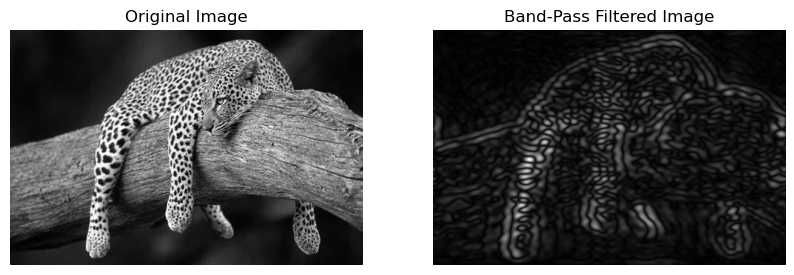

In [6]:
## BAND PASS FILTER 
import cv2
import numpy as np
from scipy.fftpack import fft2, ifft2, fftshift
import matplotlib.pyplot as plt

def band_pass_filter(image, low_cutoff, high_cutoff):
    # Fourier transform
    f = fft2(image)
    fshift = fftshift(f)
    
    # Create a mask with a band-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 1
    mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 0
    
    # Apply the mask and inverse Fourier transform
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    return img_back

# Load image
image = cv2.imread('C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif',0)
filtered_image = band_pass_filter(image, 10, 30)

# Display results using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Band-Pass Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()
